# Restaurant Recommendation Project

Objective of this project is to use Content based Filtering to recommend a restaurant in Bangalore using User's preferences in location, cuisine, cost of two.

###  We will work on Zomato Bangalore Dataset

### [Link for the dataset on kaggle](http://https://www.kaggle.com/datasets/absin7/zomato-bangalore-dataset)

## Importing libraraies and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import warnings 
warnings.filterwarnings('ignore')

print('Libraries Imported.')

Libraries Imported.


### Importing Zomato Bangalore DataSet

## About the features in the dataset :

`URL` = contains the URL of the restaurant on the zomato website

`address` = contains the address of the restaurant in Bengaluru

`name` = contains the name of the restaurant

`online_order` = whether online ordering is available in the restaurant or not

`book_table` = table book option available or not

`rate` = contains the overall rating of the restaurant out of 5

`votes` = contains total number of rating for the restaurant as of the above-mentioned date

`phone` = contains the phone number of the restaurant

`location` = contains the neighborhood in which the restaurant is located

`rest_type` = restaurant type

`dish_liked` = dishes people liked in the restaurant

`cuisines` = food styles, separated by a comma

`approx_cost(for two people)` = contains the approximate cost for a meal for two people

`reviews_list` = list of tuples containing reviews for the restaurant, each tuple consists of two values

To find restaurants to recommend, our approach would be to use the reviews of the restaurant and apply sentiment analysis on that. Then using these sentiment scores we can rank restaurants and recommend the ones that fit the constarints set by the user.

### We have already conducted sentiment Analysis on the reviews on a different notebook. So we will load that data set here and work on that. 

#### [Link for the Sentiment analysis Notebook](https://www.kaggle.com/code/gagandeepsinghbindra/sentiment-analysis-part-for-recommendation-project)

Sentiment_scores = contains the sentiment score based on reviews left for the restaurant. Range is -1(most negative) to +1(most positive)
cleaned_reviews = conatins the cleaned reviews of the restaurant in one paragraph

In [2]:
data=pd.read_csv('Cleaned-Zomato-data-with-sentiment-scores.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Sentiment_score,cleaned_reviews
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0.350449,a beautiful place to dine in the interiors tak...
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0.206022,had been here for dinner with family turned ou...
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0.199841,ambience is not that good enough and it s not ...
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0.245714,great food and proper karnataka style full mea...
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0.434280,very good restaurant in neighbourhood buffet s...


In [3]:
data.shape

(51717, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

### Cleaning Cuisines, Location and cost for two people as it is our main features to be used for selecting restaurants

Lets look at the locations in the dataset

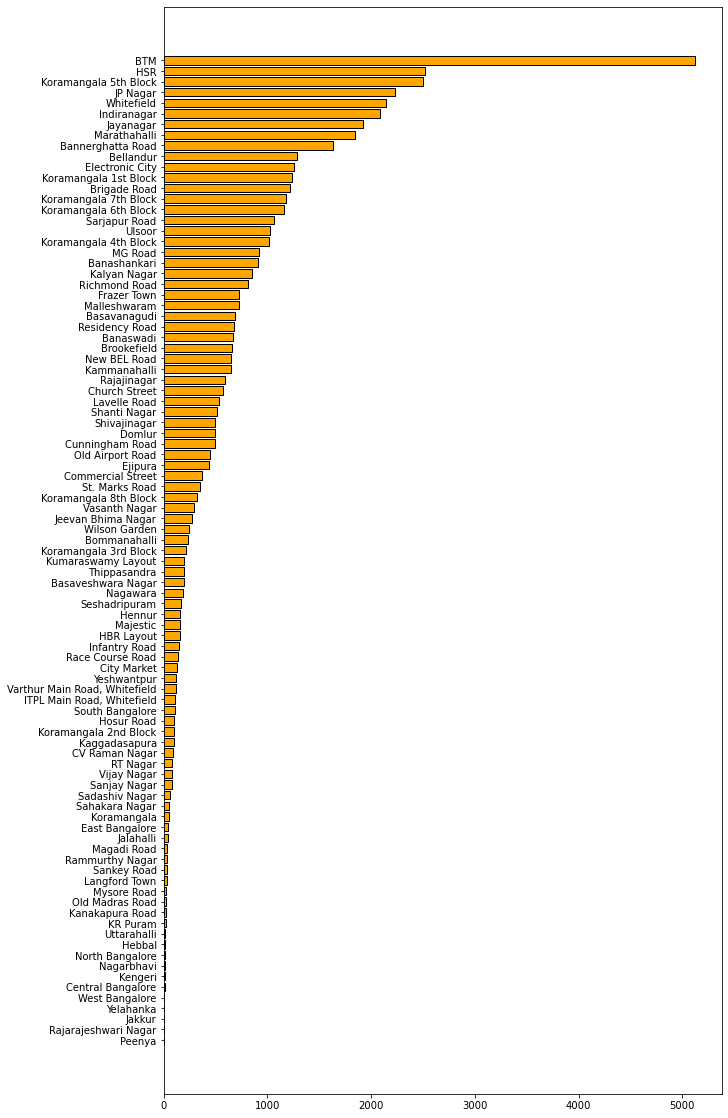

In [5]:
fig,ax=plt.subplots(figsize=(10,20))
ax.barh(y=data.location.value_counts().sort_values().index,width=data.location.value_counts().sort_values().values,edgecolor='k',color='orange');

In [6]:
#checking number of null values in location column
data.location.isna().sum()

21

For these 21 values we will try to see if its address is available in the datatset and impute its location from there

In [7]:
list(data.address.loc[data.location.isna()])

['6, Abbiah Layout KC Halli Main Road, Bommanahalli, Bangalore',
 '6, Abbiah Layout KC Halli Main Road, Bommanahalli, Bangalore',
 'Chandapura- Anakal Main Road, Oppsite Vemana Hosipatal, Electronic City, Bangalore',
 'Kudlu Gate, Bommanahalli, Bangalore',
 'IB Road, Lorry Stand, Kushaal Nagar, Ward 10, Kalyan Nagar, Bangalore',
 'Koramangala 8th Block, Bangalore',
 '6, Kathalipalya Village, 6th Cross, Koramangala 6th Block, Bangalore',
 '6, Kathalipalya Village, 6th Cross, Koramangala 6th Block, Bangalore',
 'Koramangala 8th Block, Bangalore',
 '6, Kathalipalya Village, 6th Cross, Koramangala 6th Block, Bangalore',
 '6, Kathalipalya Village, 6th Cross, Koramangala 6th Block, Bangalore',
 'Koramangala 8th Block, Bangalore',
 '80 Feet Road, Koramangala 4th Block, Bangalore',
 'Koramangala 8th Block, Bangalore',
 '399/34, 19th Main, Near Navarang Theatre, 2nd Block, Rajajinagar, Bangalore',
 '1630, 6th Main Road, AECS Layout E Block, Marathahalli, Bangalore',
 '1630, 6th Main Road, AECS 

So we see that for such cases we can get the location from the address.

In [8]:
list_of_locations=list(data.location.unique())

#fucntion that returns the location by searching the words of the address
def location_finder(add):
    if add is not '':
        for x in list_of_locations:
            if str(x) in add:
                return x

#creating a dataframe of empty location cells
empty_df=data.loc[data.location.isna()]

for i in empty_df.index:
    data.at[i,'location']=location_finder(data.address[i])


In [9]:
data[data.location.isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Sentiment_score,cleaned_reviews
46609,https://www.zomato.com/bangalore/grill-biryani...,"West of Chord Road, Govindaraja Nagar, Below H...",Grill Biryanis,No,No,NaN,0,NaN,None,NaN,NaN,NaN,NaN,[],[],Delivery,Rajajinagar,0.0,NaN


Since Govindraja Nagar is not in list of locations we will add it manually.

In [10]:
data.at[46609,'location']='Govindraja Nagar'

In [11]:
data.location.isna().sum()

0

### `location` column is now cleaned

Lets look at the ditribution of location again

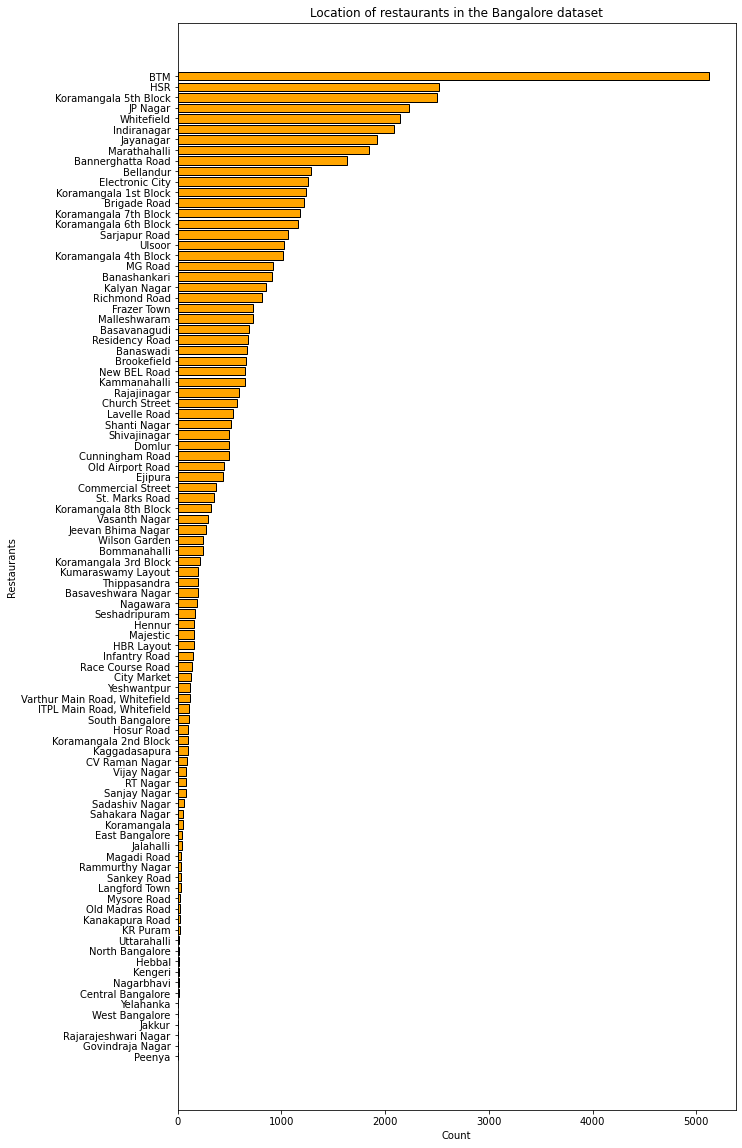

In [12]:
fig,ax=plt.subplots(figsize=(10,20))
ax.barh(y=data.location.value_counts().sort_values().index,width=data.location.value_counts().sort_values().values,edgecolor='k',color='orange')
ax.set_title('Location of restaurants in the Bangalore dataset')
ax.set_xlabel('Count')
ax.set_ylabel('Restaurants');

### Cleaning `cuisines` column

In [13]:
len(data.cuisines.unique())

2724

In [14]:
type(data.cuisines[0])

str

In [15]:
data.cuisines[0]

'North Indian, Mughlai, Chinese'

Converting string to a list of strings so that we can see the unique values in this column

In [16]:
def str_to_lst(row):
    return [x.strip() for x in str(row).split(',')]

In [17]:
cuisines_copy=data.cuisines.apply(str_to_lst)

In [18]:
cuisines_copy

0                [North Indian, Mughlai, Chinese]
1                   [Chinese, North Indian, Thai]
2                        [Cafe, Mexican, Italian]
3                    [South Indian, North Indian]
4                      [North Indian, Rajasthani]
                           ...                   
51712                               [Continental]
51713                               [Finger Food]
51714                               [Finger Food]
51715                               [Finger Food]
51716    [Finger Food, North Indian, Continental]
Name: cuisines, Length: 51717, dtype: object

### Finding unique values in cuisines

In [19]:
set_of_cuisines=set()

def accumulator(lst):
    for x in lst:
        set_of_cuisines.add(x.strip())

cuisines_copy.apply(accumulator);

In [20]:
set_of_cuisines

{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Pa

In [21]:
len(set_of_cuisines)

108

We will now bin these 108 cuisines into the following categories:

1. Afghani
2. Western
3. Thai and Tibetian
4. Beverages
5. South Indian
6. Fast Food
7. Desserts
8. Chicken, Biryani and Kababs
9. Bengali
10. Pizza
11. International
12. North Indian
13. Chinese
14. Western Indian Cuisines
15. Maharastrian food
16. North Eastern
17. Seafood

In [22]:
#making a custom function to replace multiple substrings simultaneously
def replace_all(lst,strng,text):
    for i in lst:
        text = text.replace(i, strng)
    return text


In [23]:

def cuisines_binning(text):
    text=str(text)
    text=replace_all(['Raw Meats','Salad','Sri Lankan','Tex-Mex','Vegan'],'',text)
    text=replace_all(['Afghan','Afghani','Mughlai'],'Afghani',text)
    text=replace_all(['African','American','British','European','South American','Spanish','Steak'],'Western',text)
    text=replace_all(['Thai','Tibetan'],'Thai and Tibetian',text)
    text=replace_all(['Bar Food','Beverages','Bubble Tea','Coffee','Drinks Only','Juices','Tea'],'Beverages',text)
    text=replace_all(['Andhra','Chettinad','Kerala','Oriya','South Indian','Tamil'],'South Indian',text)
    text=replace_all(['BBQ','Burger','Cafe','Fast Food','Finger Food','Healthy Food','Hot dogs','Momos','Rolls','Sandwich','Street Food','Wraps'],'Fast Food',text)
    text=replace_all(['Bakery','Desserts','Ice Cream','Mithai','Paan',],'Deserts',text)
    text=replace_all(['Biryani','Charcoal Chicken','Grill','Kebab','Roast Chicken'],'Chicken, Biryani and Kebabs',text)
    text=replace_all(['Bengali'],'Bengali',text)
    text=replace_all(['Pizza','Italian'],'Pizza',text)
    text=replace_all(['Arabian','Asian','Assamese','Australian','Belgian','Burmese','Cantonese','Continental','French','German','Greek','Indonesian','Iranian','Japanese','Jewish','Korean','Lebanese','Malaysian','Mangalorean','Mediterranean','Mexican','Middle Eastern','Mongolian','Pan Asian','Portuguese','Russian','Singaporean','Sushi','Turkish','Vietnamese'],'International',text)
    text=replace_all(['Bihari','Kashmiri','Lucknowi','Modern Indian','North Indian'],'North Indian',text)
    text=replace_all(['Naga','Nepalese','North Eastern'],'North Eastern',text)
    text=replace_all(['Chinese'],'Chinese',text)
    text=replace_all(['Awadhi','Bohri','Goan','Gujarati','Hyderabadi','Parsi','Rajasthani','Sindhi',],'Western Indian',text)
    text=replace_all(['Konkan','Maharashtrian','Malwani'],'Maharastrian Food',text)
    text=replace_all(['Seafood'],'Seafood',text)
    
    #Removing duplicates and cleaning text further
    text.replace(' ,','')
    lst=text.split(', ')
    return ' '.join(list(set(lst))).strip()


data.cuisines=data.cuisines.apply(cuisines_binning)

In [24]:
data.cuisines[:20]

0                North Indian Chinese Afghani
1      North Indian Chinese Thai and Tibetian
2               International Pizza Fast Food
3                   North Indian South Indian
4                 North Indian Western Indian
5                                North Indian
6           North Indian Chinese South Indian
7                             Pizza Fast Food
8               International Pizza Fast Food
9     International Pizza Beverages Fast Food
10                                  Fast Food
11              International Pizza Fast Food
12      International Chinese Fast Food Pizza
13                    International Fast Food
14              International Pizza Fast Food
15                                  Fast Food
16            International Chinese Fast Food
17                    Chinese Fast Food Pizza
18                    Pizza Western Fast Food
19      International Chinese Fast Food Pizza
Name: cuisines, dtype: object

`cuisines` is now cleaned.

In [25]:
def strng_to_lst(row):
    return()

### Cleaning `approx_cost(for two people)`

In [26]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51717, dtype: object

Converting to float and removing commas

In [27]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(',','').astype(float)

In [28]:
data['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

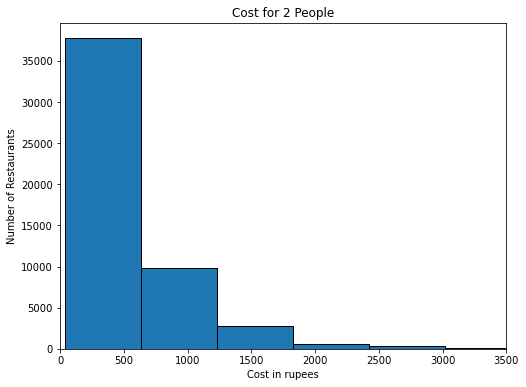

In [29]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(data['approx_cost(for two people)'],edgecolor='k',bins=10)
ax.set_xlim((0,3500))
ax.set_title('Cost for 2 People')
ax.set_xlabel('Cost in rupees')
ax.set_ylabel('Number of Restaurants');

### Converting rate and votes to numeric datatype

In [30]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
data.rate=data.rate.str.replace('/5','').replace('NEW','0').replace('-','0').astype(float).fillna(0)

In [32]:
data.votes=data.votes.astype(float)

In [33]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Sentiment_score,cleaned_reviews
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",North Indian Chinese Afghani,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0.350449,a beautiful place to dine in the interiors tak...
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",North Indian Chinese Thai and Tibetian,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0.206022,had been here for dinner with family turned ou...
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",International Pizza Fast Food,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0.199841,ambience is not that good enough and it s not ...
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,North Indian South Indian,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0.245714,great food and proper karnataka style full mea...
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",North Indian Western Indian,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0.434280,very good restaurant in neighbourhood buffet s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27.0,080 40301477,Whitefield,Bar,NaN,International,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,0.372377,food and service are incomparably excellent th...
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,0.0,+91 8197675843,Whitefield,Bar,NaN,Fast Food,600.0,[],[],Pubs and bars,Whitefield,0.000000,NaN
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0.0,NaN,Whitefield,Bar,NaN,Fast Food,2000.0,[],[],Pubs and bars,Whitefield,0.000000,NaN
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236.0,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Fast Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,0.298507,nice and friendly place and staff is awesome a...


### Droping Duplicated restaurants

In [34]:
data.drop_duplicates(subset=['address'], keep='first', inplace=True)
data.reset_index(drop=True,inplace=True)

### Metric for ranking Restaurants

We will use :
* Sentiment Score
* average Rating of Restaurant 
* number of votes 

Lets give equal weightage to these features for now and see the results

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaled_rating=MinMaxScaler().fit_transform(data[['rate']])
scaled_votes=MinMaxScaler().fit_transform(data[['votes']])

In [36]:
data['scaled_rating']=scaled_rating
data['scaled_votes']=scaled_votes

In [37]:
data['Metric']=(data.Sentiment_score + data.scaled_rating + data.scaled_votes)/3

# Recommending Restaurants

Asking user for his preferences

In [38]:
def recommender(input_location,input_cuisine,input_cost):
    filtered_df=data.loc[(data.location==input_location) & (data.cuisines.str.contains(input_cuisine)) & (data['approx_cost(for two people)']<=input_cost)  & (data.votes>50)]
    return(filtered_df.sort_values('Metric',ascending=False).head())


In [39]:
pd.set_option('display.max_columns', None)

## Creating GUI for the Recommendation System

In [41]:
from tkinter import *
from tkinter import ttk

In [59]:
root=Tk()
root.title('Restaurant Recommendation')
root.geometry('500x500')


options1=['location','Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road', 'Malleshwaram',
       'Seshadripuram', 'Kammanahalli', 'Koramangala 6th Block',
       'Majestic', 'Langford Town', 'Central Bangalore', 'Sanjay Nagar',
       'Brookefield', 'ITPL Main Road, Whitefield',
       'Varthur Main Road, Whitefield', 'KR Puram',
       'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala',
       'Hosur Road', 'Rajajinagar', 'Banaswadi', 'North Bangalore',
       'Nagawara', 'Hennur', 'Kalyan Nagar', 'New BEL Road', 'Jakkur',
       'Rammurthy Nagar', 'Thippasandra', 'Kaggadasapura', 'Hebbal',
       'Kengeri', 'Sankey Road', 'Sadashiv Nagar', 'Basaveshwara Nagar',
       'Yeshwantpur', 'West Bangalore', 'Magadi Road', 'Yelahanka',
       'Sahakara Nagar', 'Peenya']

options2=['Cuisine','Afghani',
'Western',
'Thai and Tibetian',
'Beverages',
'South Indian',
'Fast Food',
'Desserts',
'Chicken, Biryani and Kababs',
'Bengali',
'Pizza',
'International',
'North Indian',
'Chinese',
'Western Indian Cuisines',
'Maharastrian food',
'North Eastern',
'Seafood']

options3=['Cost for two',200,400,600,800,1000,1200,1500,1800,2000,2500,3000,3500,4000,4500,5000,5500,6000]

frame = Frame(root)
frame.pack()

def comboclick(event):
    global a
    myLabel=Label(root, text=mycombo.get()).pack()
    a=mycombo.get()
    
def comboclick2(event):
    global b
    myLabel=Label(root, text=mycombo2.get()).pack()
    b=mycombo2.get()
    
def comboclick3(event):
    global c
    myLabel=Label(root, text=mycombo3.get()).pack()
    c=float(mycombo3.get())
    

mycombo=ttk.Combobox(root, value=options1)
mycombo.current(0)
mycombo.bind('<<ComboboxSelected>>',comboclick)
mycombo.place(x=10, y=10)

mycombo2=ttk.Combobox(root, value=options2)
mycombo2.current(0)
mycombo2.bind('<<ComboboxSelected>>',comboclick2)
mycombo2.pack()
mycombo2.place(x=180, y=10)

mycombo3=ttk.Combobox(root, value=options3)
mycombo3.current(0)
mycombo3.bind('<<ComboboxSelected>>',comboclick3)
mycombo3.pack()
mycombo3.place(x=350, y=10)

def retrieve1():
    print(mycombo.get())
    

def retrieve2():
    print(mycombo2.get())


def retrieve3():
    print(mycombo3.get())
     
Button1 = Button(frame, text = "Submit", command = retrieve1)
Button1.pack(side=LEFT,padx=10,pady=50)



Button2 = Button(frame, text = "Submit", command = retrieve2)
Button2.pack(side=LEFT,padx=120,pady=50)


Button3 = Button(frame, text = "Submit", command = retrieve3)
Button3.pack(side=RIGHT,padx=20,pady=50)



root.mainloop()


Kumaraswamy Layout
Afghani
600


In [60]:
input_location=a
input_cuisine=b
input_cost=c
Final_recommendations=recommender(input_location,input_cuisine,input_cost)
Final_recommendations[['name','rate','votes','cleaned_reviews','location','approx_cost(for two people)','Sentiment_score','Metric']].rename(columns={'approx_cost(for two people)': 'Cost','cleaned_reviews': 'reviews','name':'Name'})

,Name,rate,votes,reviews,location,Cost,Sentiment_score,Metric
145,Roll N Rock,3.8,124.0,ordered paneer roll through zomato through the...,Kumaraswamy Layout,400.0,0.363725,0.382274


In [63]:
data.cleaned_reviews[145]

'ordered paneer roll through zomato through these guys well i wouldn t say i was completely satisfied n neither would i say i was dissatisfied just a feeling of could have been better paneer was soft n nice n the paratha was aptly cooked i kind of felt let down by the filling may be the masala this has a tangy taste which is good but not as good as the red masala i had requested the to make it spicy n it wasn t overall it was an average fare n not much to complain about like i said earlier this could have been lot better might order other rolls in the future great place to have fried rice and rolls at a reasonable place quick to serve and take away no place to sit and devour the dish but always a nice place to visit for takeaway'